In [1]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
import numpy as np
import matplotlib.pyplot as plt

given <br/>
scale factor , $\sigma^2$ = 1.1 (not sure if it's $\sigma^2$ or $\frac{\sigma^2}{\lambda}$ where $\lambda$ is regularizer term)<br/>
length scale, $l$ = 0.1 <br/>

$k(x,x') = \frac{\sigma^2}{\lambda} e^{-\frac{(x-x')^2}{2l^2}} $

(50, 1)


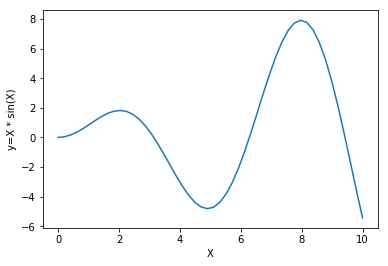

In [2]:
X =  np.linspace(0,10,50).reshape(-1,1)
y = X * np.sin(X)
print(X.shape)
plt.plot(X,y)
plt.xlabel('X')
plt.ylabel('y=X * sin(X)')
plt.show()

In [3]:
X[0:15,:].shape

(15, 1)

In [4]:
kernel = 1.1 * RBF(length_scale=0.1, length_scale_bounds=(1e-3, 1.0))
gp = GaussianProcessRegressor(kernel=kernel)
sample = X[0:15,:]
y = sample * np.sin(sample)
gp.fit(sample,y)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
             kernel=1.05**2 * RBF(length_scale=0.1),
             n_restarts_optimizer=0, normalize_y=False,
             optimizer='fmin_l_bfgs_b', random_state=None)

/home/samin/environments/py36_env/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


ValueError: Input passed into argument "'x'"is not 1-dimensional.

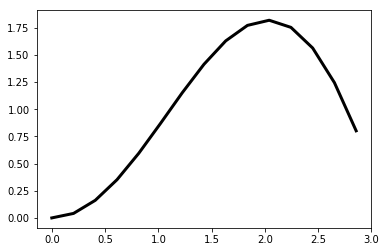

In [5]:
y_mean, y_std = gp.predict(sample, return_std=True)
plt.plot(sample, y_mean, 'k', lw=3, zorder=9)
plt.fill_between(sample, y_mean - y_std, y_mean + y_std,
                 alpha=0.2, color='k')

In [ ]:
# Plot prior
plt.figure(1, figsize=(8, 8))
plt.subplot(2, 1, 1)
X_ = np.linspace(0, 5, 100)
y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
plt.fill_between(X_, y_mean - y_std, y_mean + y_std,
                 alpha=0.2, color='k')
y_samples = gp.sample_y(X_[:, np.newaxis], 10)
plt.plot(X_, y_samples, lw=1)
plt.xlim(0, 5)
plt.ylim(-3, 3)
plt.title("Prior (kernel:  %s)" % kernel, fontsize=12)

In [ ]:
X_[:, np.newaxis].shape

In [ ]:
X.shape

In [ ]:
X[0:15,:].shape

In [ ]:
y_mean, y_std = gp.predict(X[0:15,np.newaxis], return_std=True)
plt.plot(X[0:15,np.newaxis], y_mean, 'k', lw=3, zorder=9)
plt.fill_between(X[0:15], y_mean - y_std, y_mean + y_std,alpha=0.2, color='k')
y_samples = gp.sample_y(X[0:15, np.newaxis], 10)

In [ ]:
kernel = 1.1 * RBF(length_scale=10, length_scale_bounds=(1e-3, 1.0))
gp = GaussianProcessRegressor(kernel=kernel)
gp.fit(X[:,np.newaxis],y)

In [ ]:
plt.plot(np.square(y_std))

In [ ]:
kernels = [1.1 * RBF(length_scale=0.1, length_scale_bounds=(1e-3, 1.0))]

for fig_index, kernel in enumerate(kernels):
    # Specify Gaussian Process
    gp = GaussianProcessRegressor(kernel=kernel)

    # Plot prior
    plt.figure(fig_index, figsize=(8, 8))
    plt.subplot(2, 1, 1)
    X_ = np.linspace(0, 15, 100)
    y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
    plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
    plt.fill_between(X_, y_mean - y_std, y_mean + y_std,
                     alpha=0.2, color='k')
    y_samples = gp.sample_y(X_[:, np.newaxis], 10)
    plt.plot(X_, y_samples, lw=1)
    plt.xlim(0, 15)
    plt.ylim(-10, 15)
    plt.title("Prior (kernel:  %s)" % kernel, fontsize=12)

    # Generate data and fit GP
    rng = np.random.RandomState(4)
    X = rng.uniform(0, 5, 10)[:, np.newaxis]
    y = X[:, 0]*np.sin(X[:, 0])
    gp.fit(X, y)

    # Plot posterior
    plt.subplot(2, 1, 2)
    X_ = np.linspace(0, 5, 100)
    y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
    plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
    plt.fill_between(X_, y_mean - y_std, y_mean + y_std,
                     alpha=0.2, color='k')

    y_samples = gp.sample_y(X_[:, np.newaxis], 10)
    plt.plot(X_, y_samples, lw=1)
    plt.scatter(X[:, 0], y, c='r', s=50, zorder=10, edgecolors=(0, 0, 0))
    plt.xlim(0, 15)
    plt.ylim(-10, 15)
    plt.title("Posterior (kernel: %s)\n Log-Likelihood: %.3f"
              % (gp.kernel_, gp.log_marginal_likelihood(gp.kernel_.theta)),
              fontsize=12)
    plt.tight_layout()

plt.show()

In [ ]:
kernels = [1.1 * RBF(length_scale=0.1, length_scale_bounds=(1e-1, 10.0))]
gp = GaussianProcessRegressor(kernel=kernel)

# Plot prior
plt.figure(fig_index, figsize=(8, 8))
plt.subplot(2, 1, 1)
X_ = np.linspace(0, 100, 5000)
y = X_ * np.sin(X_)
gp.fit(X_[:,np.newaxis],y)
y_mean, y_std = gp.predict(X_[0:15, np.newaxis], return_std=True)
plt.plot(X_[0:15], y_mean, 'k', lw=3, zorder=9)
plt.fill_between(X_[0:15], y_mean - y_std, y_mean + y_std,
                 alpha=0.2, color='k')
y_samples = gp.sample_y(X_[0:15, np.newaxis], 10)
plt.plot(X_[0:15], y_samples, lw=1)
plt.xlim(0, 5)
plt.ylim(-3, 3)
plt.title("Prior (kernel:  %s)" % kernel, fontsize=12)

In [ ]:
gp.fit(X_[:,np.newaxis],y)

In [ ]:
X=np.linspace(0, 10, 50).reshape(-1,1)
X[:,0].shape

In [ ]:
kernels = [1.1 * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0))]

for fig_index, kernel in enumerate(kernels):
    # Specify Gaussian Process
    gp = GaussianProcessRegressor(kernel=kernel)

    # Plot prior
    plt.figure(fig_index, figsize=(8, 8))
    plt.subplot(2, 1, 1)
    
    X_ = np.linspace(0, 10, 50).reshape(-1,1)
    y_mean, y_std = gp.predict(X_, return_std=True)
    
    plt.plot(X_[:,0], y_mean, 'k', lw=3, zorder=9)
    plt.fill_between(X_[:,0], y_mean - y_std, y_mean + y_std,
                     alpha=0.2, color='k')
    
    y_samples = gp.sample_y(X_, 2)
    plt.plot(X_, y_samples, lw=1)
    plt.xlim(0, 5)
    plt.ylim(-3, 3)
    plt.title("Prior (kernel:  %s)" % kernel, fontsize=12)
plt.show()

In [ ]:
y_samples.shape

In [ ]:
kernels = [1.1 * RBF(length_scale=10, length_scale_bounds=(1e-1, 10.0))]

for fig_index, kernel in enumerate(kernels):
    # Specify Gaussian Process
    gp = GaussianProcessRegressor(kernel=kernel)

    # Plot prior
    plt.figure(fig_index, figsize=(8, 8))
    plt.subplot(2, 1, 1)
    
    X_ = np.linspace(0, 10, 50).reshape(-1,1)
    y_mean, y_std = gp.predict(X_, return_std=True)
    
    plt.plot(X_[:,0], y_mean, 'k', lw=3, zorder=9)
    plt.fill_between(X_[:,0], y_mean - y_std, y_mean + y_std,
                     alpha=0.2, color='k')
    
    y_samples = gp.sample_y(X_, 10)
    plt.plot(X_, y_samples, lw=1)
    plt.xlim(0, 5)
    plt.ylim(-3, 3)
    plt.title("Prior (kernel:  %s)" % kernel, fontsize=12)

In [ ]:
kernels = [1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0))]

for fig_index, kernel in enumerate(kernels):
    # Specify Gaussian Process
    gp = GaussianProcessRegressor(kernel=kernel)

    # Plot prior
    plt.figure(fig_index, figsize=(8, 8))
    plt.subplot(2, 1, 1)
    
    X_ = np.linspace(0, 10, 50)
    y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
    
    plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
    plt.fill_between(X_, y_mean - y_std, y_mean + y_std,
                     alpha=0.2, color='k')
    y_samples = gp.sample_y(X_[:, np.newaxis], 10)
    plt.plot(X_, y_samples, lw=1)
    plt.xlim(0, 5)
    plt.ylim(-3, 3)
    plt.title("Prior (kernel:  %s)" % kernel, fontsize=12)

    # Generate data and fit GP
    rng = np.random.RandomState(4)
    X = rng.uniform(0, 5, 10)[:, np.newaxis]
    y = np.sin((X[:, 0] - 2.5) ** 2)
    gp.fit(X, y)

    # Plot posterior
    plt.subplot(2, 1, 2)
    #X_ = np.linspace(0, 5, 100)
    #y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
    plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
    plt.fill_between(X_, y_mean - y_std, y_mean + y_std,
                     alpha=0.2, color='k')

    y_samples = gp.sample_y(X_[:, np.newaxis], 10)
    plt.plot(X_, y_samples, lw=1)
    plt.scatter(X[:, 0], y, c='r', s=50, zorder=10, edgecolors=(0, 0, 0))
    plt.xlim(0, 5)
    plt.ylim(-3, 3)
    plt.title("Posterior (kernel: %s)\n Log-Likelihood: %.3f"
              % (gp.kernel_, gp.log_marginal_likelihood(gp.kernel_.theta)),
              fontsize=12)
    plt.tight_layout()

plt.show()

In [ ]:
X[:,np.newaxis]

/home/samin/environments/py36_env/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


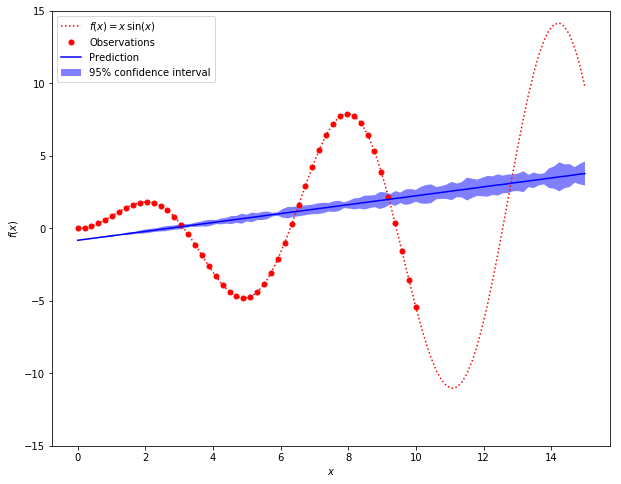

In [4]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF,DotProduct
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

#kernels = [1.1 * RBF(length_scale=0.1, length_scale_bounds=(1e-3, 1.0)),
#          1.1 * RBF(length_scale=10, length_scale_bounds=(10, 1e5))]
kernels = [DotProduct()]
def f(x):
    """The function to predict."""
    return x * np.sin(x)

for fig_index, kernel in enumerate(kernels):


    #----------------------------------------------------------------------
    #  First the noiseless case
    X = np.atleast_2d(np.linspace(0, 10, 50)).T

    # Observations
    y = f(X).ravel()



    # Instanciate a Gaussian Process model
    gp = GaussianProcessRegressor(kernel=kernel)

    # Fit to data using Maximum Likelihood Estimation of the parameters
    gp.fit(X, y)


    # Mesh the input space for evaluations of the real function, the prediction and
    # its MSE
    x = np.atleast_2d(np.linspace(0, 15, 100)).T

    # Make the prediction on the meshed x-axis (ask for MSE as well)
    y_pred, y_std = gp.predict(x, return_std=True)


    # Plot the function, the prediction and the 95% confidence interval based on
    # the MSE
    plt.figure(fig_index, figsize=(10, 8))
    #fig = pl.figure()
    plt.plot(x, f(x), 'r:', label=u'$f(x) = x\,\sin(x)$')
    plt.plot(X, y, 'r.', markersize=10, label=u'Observations')
    plt.plot(x, y_pred, 'b-', label=u'Prediction')
    plt.fill(np.concatenate([x, x[::-1]]),
            np.concatenate([y_pred - 1.9600 * y_std,
                           (y_pred + 1.9600 * y_std)[::-1]]),
            alpha=.5, fc='b', ec='None', label='95% confidence interval')
    plt.xlabel('$x$')
    plt.ylabel('$f(x)$')
    plt.ylim(-15, 15)
    plt.legend(loc='upper left')
    
plt.show()

In [ ]:
import numpy as np
from sklearn.gaussian_process import GaussianProcess
from matplotlib import pyplot as pl

np.random.seed(1)


kernels = [1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0))]

def f(x):
    """The function to predict."""
    return x * np.sin(x)

#----------------------------------------------------------------------
#  First the noiseless case
X = np.atleast_2d([1.,3., 5., 7., 8. ]).T

# Observations
y = f(X).ravel()

# Mesh the input space for evaluations of the real function, the prediction and
# its MSE
x = np.atleast_2d(np.linspace(0, 10, 50)).T

# Instanciate a Gaussian Process model
gp = GaussianProcessRegressor(kernel=kernels)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, y_std = gp.predict(x, return_std=True)


# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
pl.figure(fig_index, figsize=(10, 8))
#fig = pl.figure()
pl.plot(x, f(x), 'r:', label=u'$f(x) = x\,\sin(x)$')
pl.plot(X, y, 'r.', markersize=10, label=u'Observations')
pl.plot(x, y_pred, 'b-', label=u'Prediction')
pl.fill(np.concatenate([x, x[::-1]]),
        np.concatenate([y_pred - 1.9600 * y_std,
                       (y_pred + 1.9600 * y_std)[::-1]]),
        alpha=.5, fc='b', ec='None', label='95% confidence interval')
pl.xlabel('$x$')
pl.ylabel('$f(x)$')
pl.ylim(-10, 15)
pl.legend(loc='upper left')

In [17]:
np.squeeze(y_samples).shape

(50, 10)

/home/samin/environments/py36_env/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


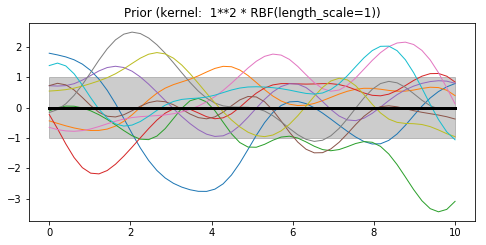

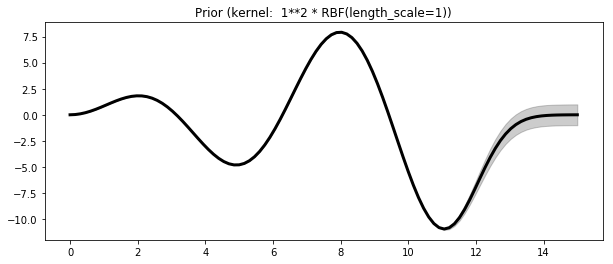

In [20]:
import numpy as np

from matplotlib import pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,
                                              ExpSineSquared, DotProduct,
                                              ConstantKernel)


kernels = [1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0))]

for fig_index, kernel in enumerate(kernels):
    # Specify Gaussian Process
    gp = GaussianProcessRegressor(kernel=kernel)

    # Plot prior
    plt.figure(fig_index, figsize=(8, 8))
    plt.subplot(2, 1, 1)
    
    X =  np.linspace(0,10,50).reshape(-1,1)
    y = X * np.sin(X)
    x = np.linspace(0,15,100).reshape(-1,1)
    
    
    #X_ = np.linspace(0, 5, 100)
    y_mean, y_std = gp.predict(X, return_std=True)
    
    
    plt.figure(fig_index, figsize=(10, 4))
    
    fig_index = fig_index+1
    
    plt.plot(X, y_mean, 'k', lw=3, zorder=9)
    plt.fill_between(X[:,0], y_mean - y_std, y_mean + y_std,
                     alpha=0.2, color='k')
    y_samples = gp.sample_y(X, 10)
    
    plt.plot(X, y_samples, lw=1)
    #plt.xlim(0, 5)
    #plt.ylim(-3, 3)
    plt.title("Prior (kernel:  %s)" % kernel, fontsize=12)
    
    
    #############################
    gp.fit(X,y)
    
    
    y_mean, y_std = gp.predict(x, return_std=True)
    
    
    plt.figure(fig_index, figsize=(10, 4))
    plt.plot(x, y_mean, 'k', lw=3, zorder=9)
    plt.fill_between(x[:,0], y_mean[:,0] - y_std, y_mean[:,0] + y_std,
                     alpha=0.2, color='k')
    #y_samples = gp.sample_y(X, 10)
    
    #plt.plot(x, np.squeeze(y_samples), lw=1)
    #plt.xlim(0, 5)
    #plt.ylim(-3, 3)
    plt.title("Prior (kernel:  %s)" % kernel, fontsize=12)
    
plt.show()

Automatically created module for IPython interactive environment


/home/samin/environments/py36_env/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


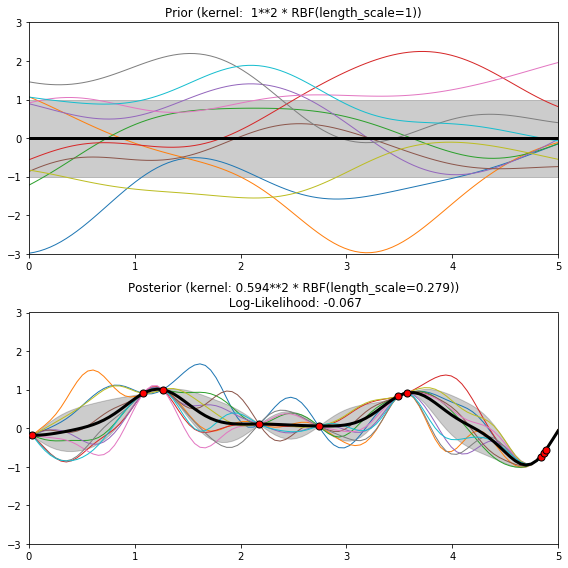

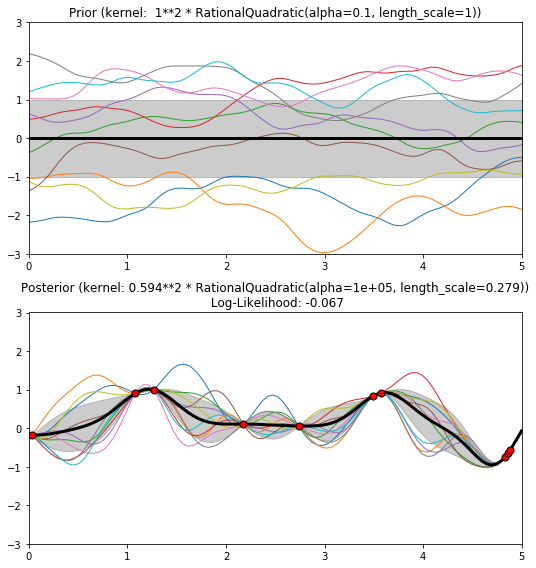

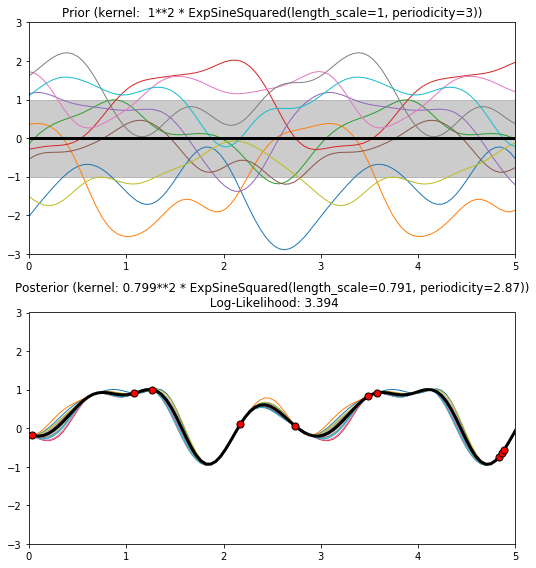

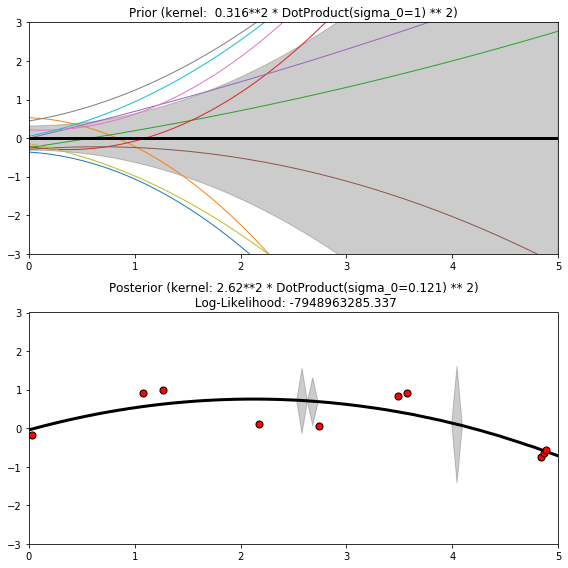

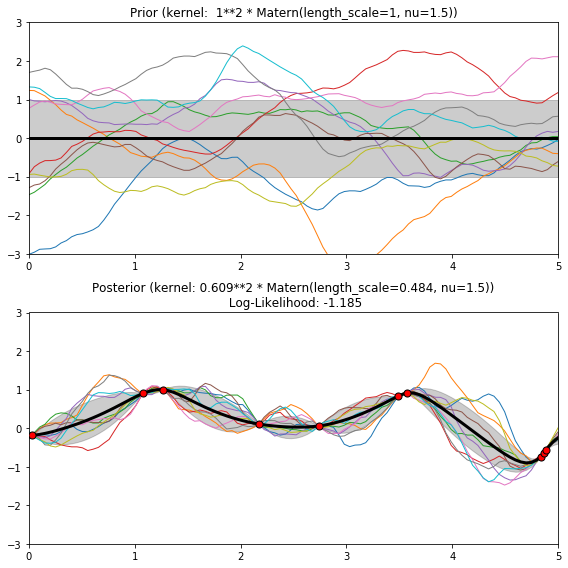

In [7]:
print(__doc__)

# Authors: Jan Hendrik Metzen <jhm@informatik.uni-bremen.de>
#
# License: BSD 3 clause

import numpy as np

from matplotlib import pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,
                                              ExpSineSquared, DotProduct,
                                              ConstantKernel)


kernels = [1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0)),
           1.0 * RationalQuadratic(length_scale=1.0, alpha=0.1),
           1.0 * ExpSineSquared(length_scale=1.0, periodicity=3.0,
                                length_scale_bounds=(0.1, 10.0),
                                periodicity_bounds=(1.0, 10.0)),
           ConstantKernel(0.1, (0.01, 10.0))
               * (DotProduct(sigma_0=1.0, sigma_0_bounds=(0.1, 10.0)) ** 2),
           1.0 * Matern(length_scale=1.0, length_scale_bounds=(1e-1, 10.0),
                        nu=1.5)]

for fig_index, kernel in enumerate(kernels):
    # Specify Gaussian Process
    gp = GaussianProcessRegressor(kernel=kernel)

    # Plot prior
    plt.figure(fig_index, figsize=(8, 8))
    plt.subplot(2, 1, 1)
    X_ = np.linspace(0, 5, 100)
    y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
    plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
    plt.fill_between(X_, y_mean - y_std, y_mean + y_std,
                     alpha=0.2, color='k')
    y_samples = gp.sample_y(X_[:, np.newaxis], 10)
    plt.plot(X_, y_samples, lw=1)
    plt.xlim(0, 5)
    plt.ylim(-3, 3)
    plt.title("Prior (kernel:  %s)" % kernel, fontsize=12)

    # Generate data and fit GP
    rng = np.random.RandomState(4)
    X = rng.uniform(0, 5, 10)[:, np.newaxis]
    y = np.sin((X[:, 0] - 2.5) ** 2)
    gp.fit(X, y)

    # Plot posterior
    plt.subplot(2, 1, 2)
    X_ = np.linspace(0, 5, 100)
    y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
    plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
    plt.fill_between(X_, y_mean - y_std, y_mean + y_std,
                     alpha=0.2, color='k')

    y_samples = gp.sample_y(X_[:, np.newaxis], 10)
    plt.plot(X_, y_samples, lw=1)
    plt.scatter(X[:, 0], y, c='r', s=50, zorder=10, edgecolors=(0, 0, 0))
    plt.xlim(0, 5)
    plt.ylim(-3, 3)
    plt.title("Posterior (kernel: %s)\n Log-Likelihood: %.3f"
              % (gp.kernel_, gp.log_marginal_likelihood(gp.kernel_.theta)),
              fontsize=12)
    plt.tight_layout()

plt.show()

In [21]:
np.random.normal(0, 0.5, 1000)

array([ 8.12172682e-01, -3.05878207e-01, -2.64085876e-01, -5.36484311e-01,
        4.32703815e-01, -1.15076935e+00,  8.72405882e-01, -3.80603450e-01,
        1.59519548e-01, -1.24685188e-01,  7.31053969e-01, -1.03007035e+00,
       -1.61208602e-01, -1.92027177e-01,  5.66884721e-01, -5.49945634e-01,
       -8.62141038e-02, -4.38929209e-01,  2.11068734e-02,  2.91407607e-01,
       -5.50309589e-01,  5.72361855e-01,  4.50795360e-01,  2.51247169e-01,
        4.50427975e-01, -3.41863930e-01, -6.14451128e-02, -4.67884717e-01,
       -1.33944040e-01,  2.65177733e-01, -3.45830376e-01, -1.98376763e-01,
       -3.43586350e-01, -4.22602821e-01, -3.35623065e-01, -6.33229946e-03,
       -5.58655174e-01,  1.17207849e-01,  8.29901089e-01,  3.71022080e-01,
       -9.59177762e-02, -4.43814482e-01, -3.73579147e-01,  8.46227301e-01,
        2.54038774e-02, -3.18497823e-01,  9.54577423e-02,  1.05012757e+00,
        6.00794762e-02,  3.08601555e-01,  1.50085160e-01, -1.76124923e-01,
       -5.71259099e-01, -